In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
getty2 = pd.read_csv("data_analysis and cleaning /deKooning/auctions.csv", sep=";", encoding="iso-8859-1")

getty2

FileNotFoundError: [Errno 2] No such file or directory: 'data_analysis and cleaning /deKooning/auctions.csv'

In [ ]:
import pandas as pd

new_dataframe = getty2[["artist", "name", "price", "soldtime"]].copy()
new_dataframe = new_dataframe[new_dataframe["artist"] == "Willem de Kooning"].copy()

new_dataframe.reset_index(drop=True, inplace=True)

for idx, row in new_dataframe.iterrows():
    if pd.isna(row["price"]) and pd.isna(row["soldtime"]):
        new_dataframe.drop(idx, inplace=True)
        
dayy = []
for i in new_dataframe['soldtime']:
    string_representation = str(i)
    split_parts = string_representation.split('-')
    day = split_parts[0]
    dayy.append(day)
new_dataframe['soldtime'] = dayy
        

new_dataframe.reset_index(drop=True, inplace=True)
new_dataframe

,artist,name,price,soldtime
0,Willem de Kooning,Untitled,1370000.0,2014
1,Willem de Kooning,Untitled,20450000.0,2014
2,Willem de Kooning,Untitled,1125000.0,2014
3,Willem de Kooning,Untitled XVIII,48690000.0,2014
4,Willem de Kooning,Untitled XXIV,175250000.0,2014
...,...,...,...,...
302,Willem de Kooning,Woman V,3130000.0,2008
303,Willem de Kooning,Untitled IV,120810000.0,2008
304,Willem de Kooning,With love,44000.0,2008
305,Willem de Kooning,Untitled (Spoleto),1210000.0,2008


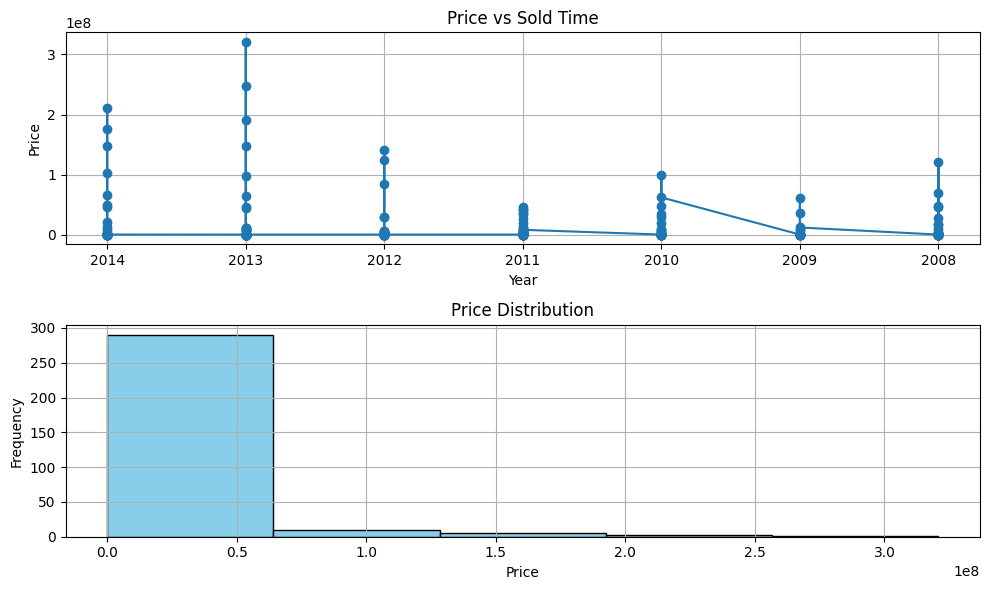

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot 1: Price vs Sold Time
plt.subplot(2, 1, 1)
plt.plot(new_dataframe["soldtime"], new_dataframe["price"], marker='o', linestyle='-')
plt.title("Price vs Sold Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)

# Plot 2: Price Distribution
plt.subplot(2, 1, 2)
plt.hist(new_dataframe["price"], bins=5, color='skyblue', edgecolor='black')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

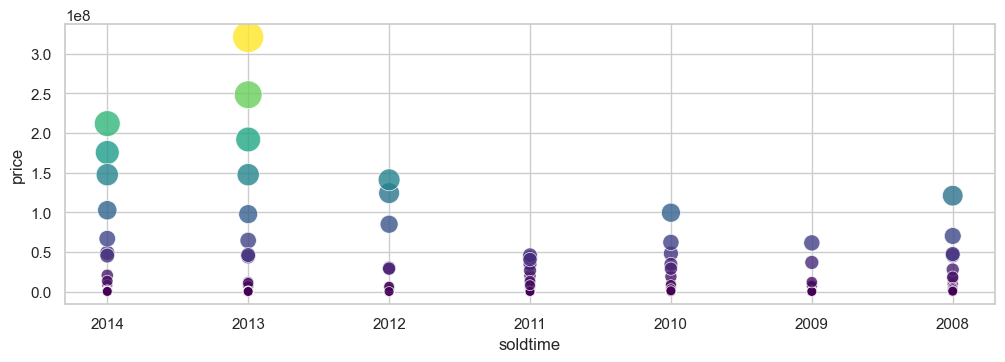

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(12, 8))

# Plot 1: Price vs Sold Time
plt.subplot(2, 1, 1)
sns.scatterplot(data=new_dataframe, x="soldtime", y="price", size="price", hue="price",
                sizes=(50, 500), legend=False, palette="viridis", alpha=0.8)
sns.regplot(data=new_dataframe, x="soldtime", y="price", scatter=False, color='black')
plt.title("Price vs Sold Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
# Annotate some points for clarity
for i in range(0, new_dataframe.shape[0], 2):
    plt.text(new_dataframe.iloc[i]["soldtime"], new_dataframe.iloc[i]["price"], 
             new_dataframe.iloc[i]["name"], fontsize=9, ha='right', va='bottom')

# Plot 2: Price Distribution
plt.subplot(2, 1, 2)
sns.kdeplot(new_dataframe["price"], shade=True, color="skyblue")
plt.axvline(new_dataframe["price"].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(new_dataframe["price"].median(), color='orange', linestyle='-.', label='Median')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Plot 1: Price vs Sold Time (Interactive)
fig = px.scatter(new_dataframe, x="soldtime", y="price", size="price", color="price",
                 hover_name="name", labels={"soldtime": "Year", "price": "Price"},
                 title="Price vs Sold Time", 
                 size_max=20, template="plotly_white")

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')),
                  selector=dict(mode='markers+lines'))

fig.update_layout(showlegend=False, xaxis=dict(showgrid=True), yaxis=dict(showgrid=True))
fig.show()

# Plot 2: Price Distribution (Interactive)
fig = px.histogram(new_dataframe, x="price", nbins=10, marginal="rug",
                   labels={"price": "Price", "count": "Frequency"},
                   title="Price Distribution", template="plotly_white")
fig.add_vline(x=new_dataframe["price"].mean(), line_dash="dash", line_color="red", 
              annotation_text="Mean", annotation_position="top left")
fig.add_vline(x=new_dataframe["price"].median(), line_dash="dash", line_color="green", 
              annotation_text="Median", annotation_position="top left")
fig.update_traces(marker_color="skyblue", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.7)
fig.update_layout(showlegend=False)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("bibliographic_data_DK.csv")

# Display the DataFrame in a proper table format
display(df)



,title,Subtitle,publisher,date,isbn,Authors
0,Le rire de De Kooning,NaN,"Bordeaux : Olympique , 2019",2019,9782955755068,NaN
1,A way of living : the art of Willem De Kooning,NaN,"London : Phaidon Press Limited , 2017",2014,0714845817,NaN
2,"Hartung et les peintres lyriques : Schneider, ...",NaN,Landerneau : Fonds Hélène & Édouard Leclerc po...,2016,9791096209002,NaN
3,Willem de Kooning : drawing seeing-seeing draw...,NaN,"New York : Arena , 1998",1998,0965728080,NaN
4,"Les irascibles : Pollock, De Kooning, Rothko e...",NaN,"Paris : le Cherche midi , DL 2023",2023,9782749176703,NaN
...,...,...,...,...,...,...
174,Écrits et propos de Willem De Kooning,Les Fiches de lecture d'Universalis,Encyclopaedia Universalis,2015,9782852296558,"Encyclopaedia Universalis,"
175,"Six Painters: Mondrian, Guston, Kline, De Koon...","Exhibition. Catalogue. Houston, Texas, Februar...",NaN,1967,OCLC:1414760875,NaN
176,"Piet Mondrian, Hans Hofmann, Willem de Kooning",europäische Künstler in den USA - amerikanisch...,NaN,2003,3793093239,Tobias Lander
177,Willem De Kooning,"die späten Gemälde, die 80er Jahre",NaN,1996,9069181681,NaN


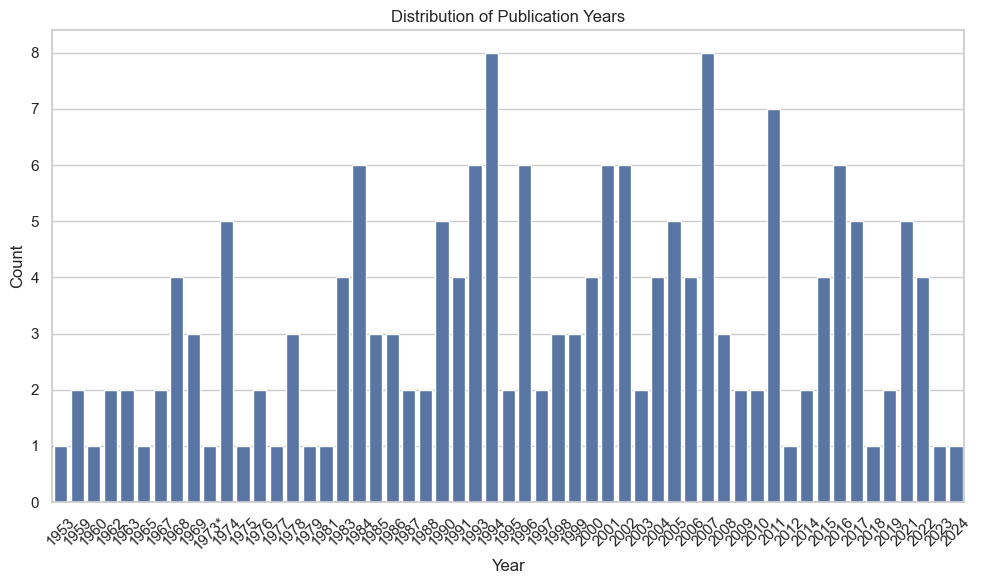

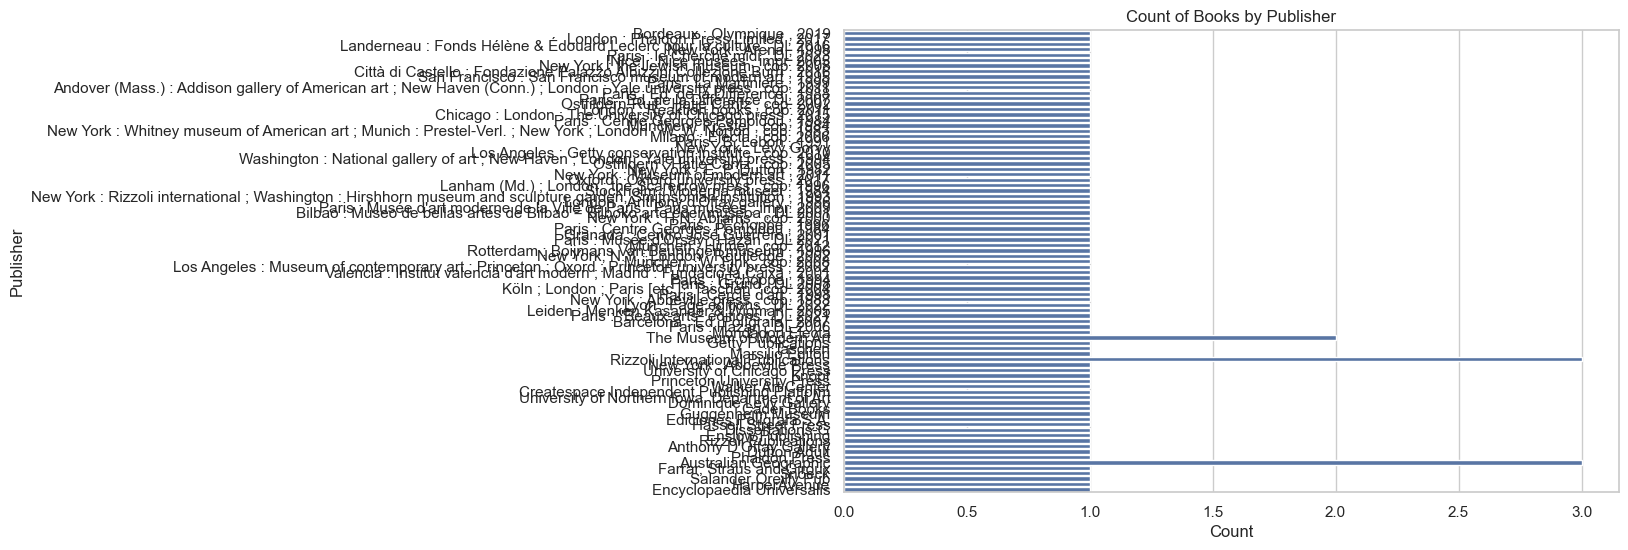

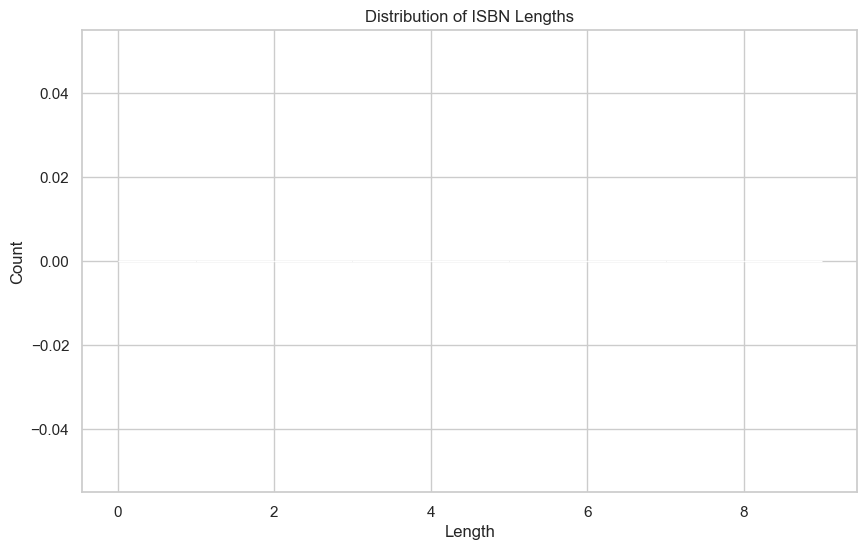

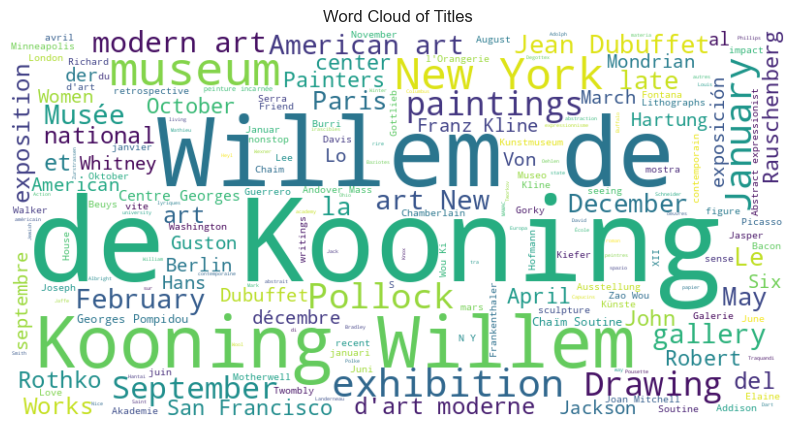

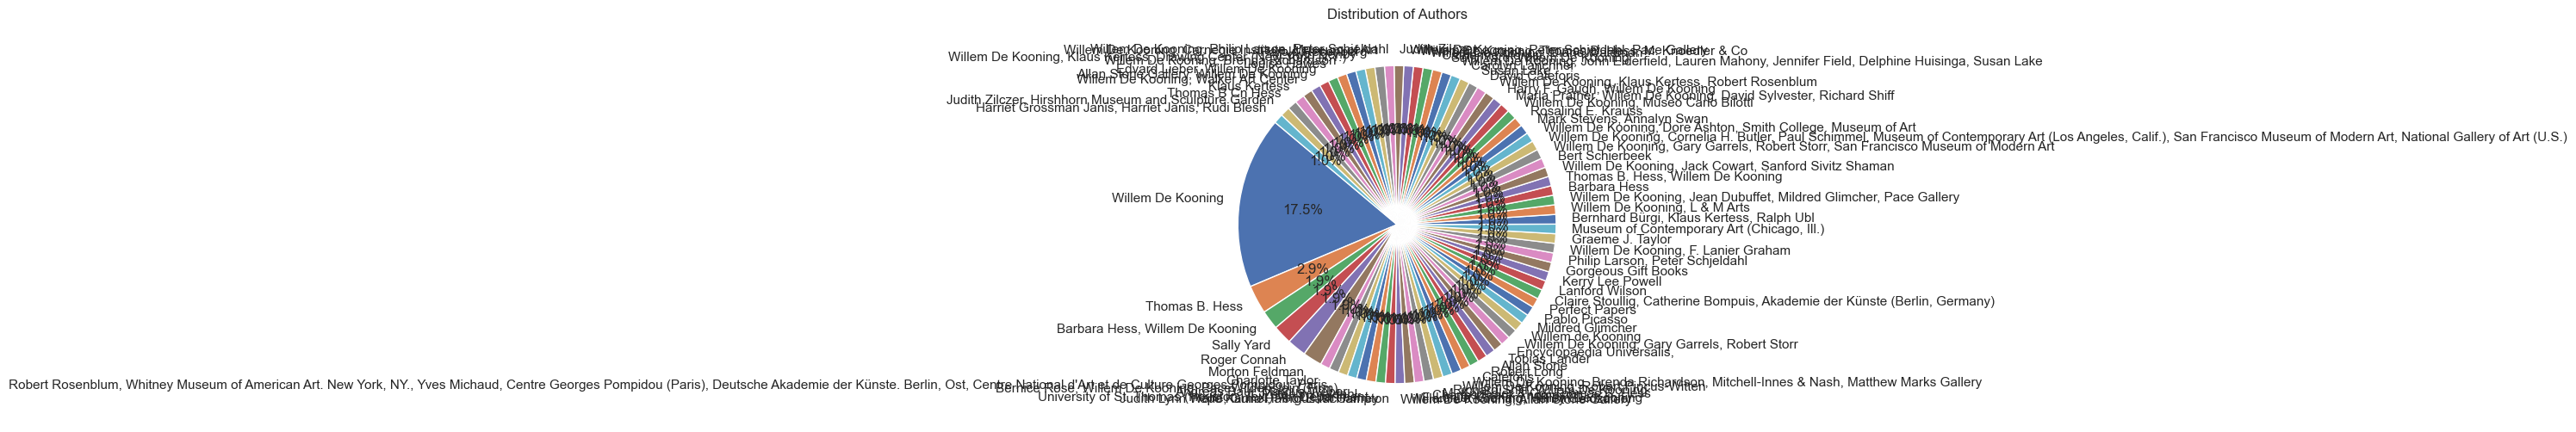

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the DataFrame
df = pd.read_csv("bibliographic_data_DK.csv")

# Sort the DataFrame by publication year
df_sorted = df.sort_values(by="date")

# 1. Bar plot of publication years with sorted and rotated x-axis tick labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sorted, x="date")
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate the x-axis tick labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


# 2. Count plot of publishers
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="publisher")
plt.title("Count of Books by Publisher")
plt.xlabel("Count")
plt.ylabel("Publisher")
plt.show()

# 3. Histogram of ISBN lengths
df['ISBN Length'] = df['isbn'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="ISBN Length", bins=range(10))
plt.title("Distribution of ISBN Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

# 4. Word cloud of titles
title_text = ' '.join(df['title'].dropna())
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Titles")
plt.axis('off')
plt.show()

# 5. Pie chart of authors
plt.figure(figsize=(10, 6))
df['Authors'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Authors")
plt.ylabel("")
plt.show()


In [ ]:
# Calculate the count of publications for each year
year_counts = df['date'].value_counts()

# Sort the counts in descending order and select the top three years
top_years = year_counts.head(3)

# Print the top three years and their corresponding counts
print("Top three years with the highest number of publications:")
for year, count in top_years.items():
    print(f"Year: {year}, Number of Publications: {count}")


Top three years with the highest number of publications:
Year: 2007, Number of Publications: 8
Year: 1994, Number of Publications: 8
Year: 2011, Number of Publications: 7
